## DDA

- 가설: 지역별 키워드 검색량과 소비량(방문객 수) 간에 상관 관계가 있을 것이다.
- 설명: 지역별로 특정 키워드의 검색량이 높을수록 해당 지역의 소비량이 증가할 것으로 예상됨.
- 따라서 특정 키워드의 검색량이 소비량과 어떤 관련이 있는지 분석하여 상관 관계를 파악합니다.
  
- 키워드 검색과 소비량 상관관계 분석
- 문제 정의: 특정 키워드 검색량과 소비량 간의 상관성을 파악하고 분석합니다.
- 배경: 어떤 키워드 검색이 소비량에 영향을 미치는지 이해하여 마케팅 전략에 반영할 수 있습니다.

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## DATA

In [88]:
df_ksearch_date = pd.read_csv("Keyword_search_by_date.csv")
df_Nvisitors_Date = pd.read_csv("Number_of_visitors_date.csv")

In [62]:
df_ksearch_date[:5]

,_id,destination_type,destination_search,region,std_year,std_month,std_year_month
0,65e92d9cbb908e26c804031e,전체,1937279,강원,2020,1,202001
1,65e92d9cbb908e26c804031f,전체,1395025,강원,2020,2,202002
2,65e92d9cbb908e26c8040320,전체,1295467,강원,2020,3,202003
3,65e92d9cbb908e26c8040321,전체,1592147,강원,2020,4,202004
4,65e92d9cbb908e26c8040322,전체,2286676,강원,2020,5,202005


In [63]:
df_ksearch_date['destination_type'].unique()

array(['전체', '숙박', '음식', '기타관광', '쇼핑', '문화관광', '역사관광', '자연관광', '체험관광',
       '레저스포츠'], dtype=object)

In [64]:
df_Nvisitors_Date[:5]

,_id,industry_major_cate,std_year_month,std_year,std_month,consumption_amount,region
0,65e932a1bb908e26c804492e,전체,202012,2020,12,59888524,강원
1,65e932a1bb908e26c804492f,전체,202001,2020,1,98147222,강원
2,65e932a1bb908e26c8044930,전체,202002,2020,2,69547139,강원
3,65e932a1bb908e26c8044931,전체,202003,2020,3,62071229,강원
4,65e932a1bb908e26c8044932,전체,202004,2020,4,75022238,강원


In [65]:
df_Nvisitors_Date['industry_major_cate'].unique()

array(['전체', '운송업', '여행업', '숙박업', '식음료업', '여가서비스업', '쇼핑업'], dtype=object)

In [96]:
df_ksearch_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7200 entries, 0 to 8159
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 7200 non-null   object
 1   destination_type    7200 non-null   object
 2   destination_search  7200 non-null   int64 
 3   region              7200 non-null   object
 4   std_year            7200 non-null   int64 
 5   std_month           7200 non-null   int64 
 6   std_year_month      7200 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 450.0+ KB


In [97]:
df_Nvisitors_Date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5021 entries, 0 to 5692
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   _id                  5021 non-null   object
 1   industry_major_cate  5021 non-null   object
 2   std_year_month       5021 non-null   int64 
 3   std_year             5021 non-null   int64 
 4   std_month            5021 non-null   int64 
 5   consumption_amount   5021 non-null   int64 
 6   region               5021 non-null   object
dtypes: int64(4), object(3)
memory usage: 313.8+ KB


## 각 데이터 검색량 top 3

### 지역별 키워드 검색량 3위까지 뽑기

In [66]:
df_ksearch_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8160 entries, 0 to 8159
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 8160 non-null   object
 1   destination_type    8160 non-null   object
 2   destination_search  8160 non-null   int64 
 3   region              8160 non-null   object
 4   std_year            8160 non-null   int64 
 5   std_month           8160 non-null   int64 
 6   std_year_month      8160 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 446.4+ KB


In [67]:
ksearch_top_3 = df_ksearch_date.groupby('std_year_month', group_keys=False, as_index=False).apply(lambda x: x.nlargest(3, 'destination_search'))

ksearch_top_3

/tmp/ipykernel_27/2175548768.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ksearch_top_3 = df_ksearch_date.groupby('std_year_month', group_keys=False, as_index=False).apply(lambda x: x.nlargest(3, 'destination_search'))


,_id,destination_type,destination_search,region,std_year,std_month,std_year_month
120,65e92d9cbb908e26c8040396,전체,6207107,경기,2020,1,202001
960,65e92d9cbb908e26c80406de,전체,4111207,서울,2020,1,202001
133,65e92d9cbb908e26c80403a3,음식,2621009,경기,2020,1,202001
121,65e92d9cbb908e26c8040397,전체,4911549,경기,2020,2,202002
961,65e92d9cbb908e26c80406df,전체,3091185,서울,2020,2,202002
...,...,...,...,...,...,...,...
7090,65e92d9dbb908e26c8041ed0,전체,5911852,서울,2023,11,202311
6344,65e92d9dbb908e26c8041be6,음식,5283945,경기,2023,11,202311
6251,65e92d9dbb908e26c8041b89,전체,11460057,경기,2023,12,202312
7091,65e92d9dbb908e26c8041ed1,전체,6531092,서울,2023,12,202312


In [68]:
ksearch_top_3['region'].unique()

array(['경기', '서울', '강원'], dtype=object)

### 기간별 관광지 방문객 수 3위 까지

In [70]:
Nvisitors_top_3 = df_Nvisitors_Date.groupby('std_year_month', group_keys=False, as_index=False).apply(lambda x: x.nlargest(3, 'consumption_amount'))

Nvisitors_top_3

/tmp/ipykernel_27/4268079277.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Nvisitors_top_3 = df_Nvisitors_Date.groupby('std_year_month', group_keys=False, as_index=False).apply(lambda x: x.nlargest(3, 'consumption_amount'))


,_id,industry_major_cate,std_year_month,std_year,std_month,consumption_amount,region
673,65e932a1bb908e26c8044bcf,전체,202001,2020,1,978194702,서울
85,65e932a1bb908e26c8044983,전체,202001,2020,1,673146482,경기
730,65e932a1bb908e26c8044c08,식음료업,202001,2020,1,556111252,서울
674,65e932a1bb908e26c8044bd0,전체,202002,2020,2,755014231,서울
86,65e932a1bb908e26c8044984,전체,202002,2020,2,537474075,경기
...,...,...,...,...,...,...,...
4364,65e932a2bb908e26c8045a3a,전체,202311,2023,11,773154427,경기
4976,65e932a2bb908e26c8045c9e,식음료업,202311,2023,11,531948753,서울
4941,65e932a2bb908e26c8045c7b,전체,202312,2023,12,1127462137,서울
4353,65e932a2bb908e26c8045a2f,전체,202312,2023,12,786040404,경기


In [71]:
Nvisitors_top_3['region'].unique()

array(['서울', '경기'], dtype=object)

### 결과

- 많이 검색된 지역 서울, 경기 강원 과 많이 방문한 지역 서울, 경기가 겹치므로 지역별 키워드 검색량과 관광지 방문객수 간에 상관 관계가 있음.

- 검색량과 방문객 수가 높은 지역의 카테고리 조사

In [72]:
Nvisitors_top_3['industry_major_cate'].value_counts()

industry_major_cate
전체      96
식음료업    48
Name: count, dtype: int64

In [73]:
ksearch_top_3['destination_type'].value_counts()

destination_type
전체    97
음식    47
Name: count, dtype: int64

- 카테고리도 전체와 음식으로 일치

### 전체 검색량 중 top 1 검색량 비율 알아보기

In [74]:
df_Nvisitors_Date['total_search'] = df_Nvisitors_Date.groupby('std_year_month')['consumption_amount'].transform('sum')
Nvisitors_top_1 = df_Nvisitors_Date.groupby('std_year_month', group_keys=False, as_index=False).apply(lambda x: x.nlargest(1, 'consumption_amount'))

Nvisitors_top_1

/tmp/ipykernel_27/3676237840.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Nvisitors_top_1 = df_Nvisitors_Date.groupby('std_year_month', group_keys=False, as_index=False).apply(lambda x: x.nlargest(1, 'consumption_amount'))


,_id,industry_major_cate,std_year_month,std_year,std_month,consumption_amount,region,total_search
673,65e932a1bb908e26c8044bcf,전체,202001,2020,1,978194702,서울,6236459955
674,65e932a1bb908e26c8044bd0,전체,202002,2020,2,755014231,서울,4713802396
675,65e932a1bb908e26c8044bd1,전체,202003,2020,3,669307101,서울,4401598283
676,65e932a1bb908e26c8044bd2,전체,202004,2020,4,731744752,서울,5101541146
677,65e932a1bb908e26c8044bd3,전체,202005,2020,5,861344285,서울,6315927015
678,65e932a1bb908e26c8044bd4,전체,202006,2020,6,812590996,서울,5693791289
679,65e932a1bb908e26c8044bd5,전체,202007,2020,7,866397053,서울,5894331754
680,65e932a1bb908e26c8044bd6,전체,202008,2020,8,761173493,서울,5758746472
681,65e932a1bb908e26c8044bd7,전체,202009,2020,9,669384587,서울,5013940373
682,65e932a1bb908e26c8044bd8,전체,202010,2020,10,835947351,서울,6159257030


<BarContainer object of 48 artists>

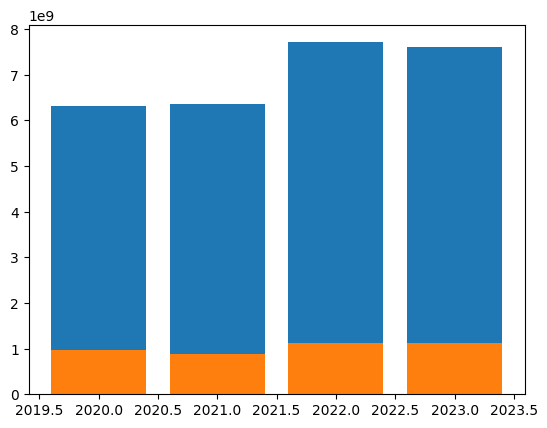

In [75]:
plt.bar(Nvisitors_top_1['std_year'], Nvisitors_top_1['total_search'], label='total Keyword Search')
plt.bar(Nvisitors_top_1['std_year'], Nvisitors_top_1['consumption_amount'], label='1st Keyword Search')

<Axes: xlabel='std_month', ylabel='consumption_amount'>

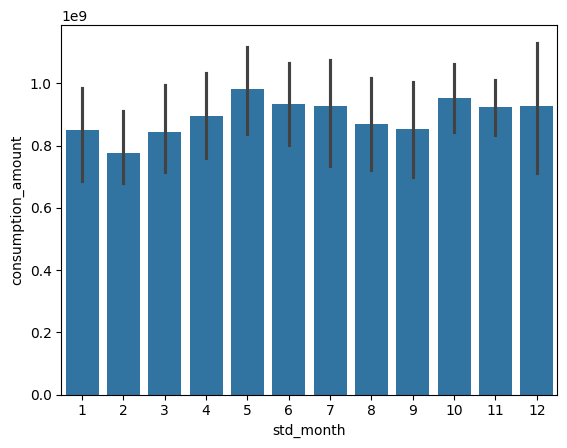

In [76]:
sns.barplot(data=Nvisitors_top_1, x='std_month', y='consumption_amount')

## 카테고리별 검색량, 방문자 소비 top 1 지역

- 지역별 카테고리 트렌드 분석
- 문제 정의: 특정 지역의 키워드 검색량과 방문자 소비 패턴을 분석하여 지역별 트렌드를 도출합니다.
- 배경: 지역에 따라 관심사가 다를 수 있으므로, 각 지역에 맞는 콘텐츠 전략 수립에 도움이 될 수 있습니다.

- 가장 많은 부분을 차지하는 서울, 경기를 제외한 결과
- 쇼핑업 : 경기 -> 부산
- 숙박업 : 강원
- 식음료업 : 경기 -> 부산
- 여가서비스업 : 경기 -> 강원
- 여행업 : 강원, 제주
- 운송업 : 대전
- 전체 : 경기 -> 부산

In [93]:
# 년도별, 카테고리별 가장 많이 검색한 지역
df_ksearch_date = df_ksearch_date.query("region != '서울' and region != '경기'")
ksearch_date = df_ksearch_date.groupby(['destination_type'], group_keys=False, as_index=False).apply(lambda x: x.nlargest(1, 'destination_search'))
ksearch_date

/tmp/ipykernel_27/983220817.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ksearch_date = df_ksearch_date.groupby(['destination_type'], group_keys=False, as_index=False).apply(lambda x: x.nlargest(1, 'destination_search'))


,_id,destination_type,destination_search,region,std_year,std_month,std_year_month
7533,65e92d9dbb908e26c804208b,기타관광,610173,인천,2023,10,202310
4136,65e92d9dbb908e26c8041346,레저스포츠,296261,강원,2022,8,202208
4132,65e92d9dbb908e26c8041342,문화관광,447895,강원,2022,8,202208
7072,65e92d9dbb908e26c8041ebe,쇼핑,448228,부산,2023,12,202312
4128,65e92d9dbb908e26c804133e,숙박,1135940,강원,2022,8,202208
4539,65e92d9dbb908e26c80414d9,역사관광,299727,경북,2022,10,202210
4129,65e92d9dbb908e26c804133f,음식,1621485,강원,2022,8,202208
4134,65e92d9dbb908e26c8041344,자연관광,717515,강원,2022,8,202208
4084,65e92d9dbb908e26c8041312,전체,4943373,강원,2022,8,202208
7993,65e92d9dbb908e26c8042257,체험관광,39513,충남,2023,8,202308


In [94]:
ksearch_date_year = df_ksearch_date.groupby(['destination_type', 'std_year' ], group_keys=False, as_index=False).apply(lambda x: x.nlargest(1, 'destination_search'))
ksearch_date_year

/tmp/ipykernel_27/3211990414.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ksearch_date_year = df_ksearch_date.groupby(['destination_type', 'std_year' ], group_keys=False, as_index=False).apply(lambda x: x.nlargest(1, 'destination_search'))


,_id,destination_type,destination_search,region,std_year,std_month,std_year_month
1334,65e92d9cbb908e26c8040854,기타관광,433065,인천,2020,1,202001
2135,65e92d9cbb908e26c8040b75,기타관광,326044,강원,2021,10,202110
5504,65e92d9dbb908e26c804189e,기타관광,446259,인천,2022,12,202212
7533,65e92d9dbb908e26c804208b,기타관광,610173,인천,2023,10,202310
83,65e92d9cbb908e26c8040371,레저스포츠,242389,강원,2020,8,202008
2123,65e92d9cbb908e26c8040b69,레저스포츠,262670,강원,2021,8,202108
4136,65e92d9dbb908e26c8041346,레저스포츠,296261,강원,2022,8,202208
6194,65e92d9dbb908e26c8041b50,레저스포츠,271037,강원,2023,8,202308
79,65e92d9cbb908e26c804036d,문화관광,248315,강원,2020,8,202008
2119,65e92d9cbb908e26c8040b65,문화관광,281196,강원,2021,8,202108


In [91]:
# 년도별, 카테고리별 가장 많이 방문한 지역
df_Nvisitors_Date = df_Nvisitors_Date.query("region != '서울' and region != '경기'")
Nvisitors_cate = df_Nvisitors_Date.groupby(['industry_major_cate'], group_keys=False, as_index=False).apply(lambda x: x.nlargest(1, 'consumption_amount'))
Nvisitors_cate

/tmp/ipykernel_27/1221256874.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Nvisitors_cate = df_Nvisitors_Date.groupby(['industry_major_cate'], group_keys=False, as_index=False).apply(lambda x: x.nlargest(1, 'consumption_amount'))


,_id,industry_major_cate,std_year_month,std_year,std_month,consumption_amount,region
3447,65e932a1bb908e26c80456a5,쇼핑업,202210,2022,10,120253697,부산
2873,65e932a1bb908e26c8045467,숙박업,202208,2022,8,31706026,강원
4898,65e932a2bb908e26c8045c50,식음료업,202312,2023,12,145336879,부산
2925,65e932a1bb908e26c804549b,여가서비스업,202205,2022,5,28032321,강원
2911,65e932a1bb908e26c804548d,여행업,202207,2022,7,651482,강원
3384,65e932a1bb908e26c8045666,운송업,202212,2022,12,68665365,대전
4857,65e932a2bb908e26c8045c27,전체,202312,2023,12,292905859,부산


In [92]:
Nvisitors_cate_year = df_Nvisitors_Date.groupby(['industry_major_cate', 'std_year' ], group_keys=False, as_index=False).apply(lambda x: x.nlargest(1, 'consumption_amount'))
Nvisitors_cate_year

/tmp/ipykernel_27/2880968523.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Nvisitors_cate_year = df_Nvisitors_Date.groupby(['industry_major_cate', 'std_year' ], group_keys=False, as_index=False).apply(lambda x: x.nlargest(1, 'consumption_amount'))


,_id,industry_major_cate,std_year_month,std_year,std_month,consumption_amount,region
648,65e932a1bb908e26c8044bb6,쇼핑업,202001,2020,1,113256916,부산
2026,65e932a1bb908e26c8045118,쇼핑업,202110,2021,10,103990117,부산
3447,65e932a1bb908e26c80456a5,쇼핑업,202210,2022,10,120253697,부산
4896,65e932a2bb908e26c8045c4e,쇼핑업,202312,2023,12,119403648,부산
26,65e932a1bb908e26c8044948,숙박업,202008,2020,8,23964303,강원
1452,65e932a1bb908e26c8044eda,숙박업,202108,2021,8,21940149,강원
2873,65e932a1bb908e26c8045467,숙박업,202208,2022,8,31706026,강원
4295,65e932a2bb908e26c80459f5,숙박업,202308,2023,8,28713164,강원
646,65e932a1bb908e26c8044bb4,식음료업,202001,2020,1,124269992,부산
2048,65e932a1bb908e26c804512e,식음료업,202111,2021,11,107484615,부산


- 가장 많은 부분을 차지하는 서울, 경기를 제외한 결과
- 기타관광 : 인천, 강원
- 레저스포츠 : 강원
- 문화관광 : 강원
- 쇼핑 : 부산, 인천
- 숙박 : 강원
- 역사관광 : 경북
- 음식 : 강원
- 자연관광 : 강원
- 전체 : 강원
- 체험관광 : 충남, 강원